# Bab 6: Decision Trees

Bab ini akan membahas Decision Trees, algoritma Machine Learning yang serbaguna dan mampu melakukan tugas klasifikasi, regresi, dan bahkan multi-output. Decision Trees adalah algoritma yang kuat, mampu menyesuaikan diri dengan dataset yang kompleks. Mereka juga merupakan komponen fundamental dari Random Forests, salah satu algoritma Machine Learning terkuat yang tersedia saat ini.

## 6.1 Training dan Visualisasi Decision Tree

Untuk memahami Decision Trees, mari kita bangun satu dan lihat bagaimana ia membuat prediksi. Decision Trees memerlukan sedikit persiapan data; mereka tidak memerlukan penskalaan fitur atau pemusatan sama sekali.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import numpy as np
import os

# Memuat dataset Iris
iris = load_iris()
X = iris.data[:, 2:]  # Panjang dan lebar kelopak
y = iris.target

# Membuat dan melatih Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

# Fungsi untuk menyimpan gambar (asumsi Anda memiliki direktori 'images/chapter6')
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout: plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Mengekspor Decision Tree ke file .dot
export_graphviz(
    tree_clf,
    out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

# Untuk mengonversi file .dot ke .png, jalankan perintah ini di terminal (memerlukan Graphviz):
# dot -Tpng images/decision_trees/iris_tree.dot -o images/decision_trees/iris_tree.png

**Penjelasan Teori:**

Kita menggunakan dataset Iris, yang berisi informasi tentang panjang dan lebar kelopak bunga. `DecisionTreeClassifier` dari Scikit-Learn digunakan untuk melatih model. `max_depth` diatur ke 2, yang berarti pohon akan memiliki kedalaman maksimum 2 tingkat. Setelah melatih pohon, kita mengekspornya ke format `.dot` menggunakan `export_graphviz`. File `.dot` ini kemudian dapat diubah menjadi gambar (misalnya, PNG) menggunakan alat `dot` dari paket Graphviz, yang harus diinstal secara terpisah.

Gambar yang dihasilkan (setelah konversi) akan menunjukkan struktur pohon keputusan, termasuk pertanyaan di setiap node, jumlah sampel yang berlaku untuk setiap node (`samples`), distribusi kelas di setiap node (`value`), dan tingkat ketidakmurnian Gini (`gini`).

## 6.2 Membuat Prediksi

Membuat prediksi dengan Decision Tree sangatlah intuitif. Anda memulai dari *root node* (node paling atas) dan mengikuti cabang berdasarkan jawaban dari pertanyaan di setiap node hingga mencapai *leaf node* (node daun). *Leaf node* ini akan memberikan prediksi kelas.

In [2]:
# Contoh prediksi
print("Prediksi untuk kelopak 5cm panjang dan 1.5cm lebar:")
print(tree_clf.predict([[5, 1.5]]))

print("Probabilitas kelas untuk kelopak 5cm panjang dan 1.5cm lebar:")
print(tree_clf.predict_proba([[5, 1.5]]))

Prediksi untuk kelopak 5cm panjang dan 1.5cm lebar:
[1]
Probabilitas kelas untuk kelopak 5cm panjang dan 1.5cm lebar:
[[0.         0.90740741 0.09259259]]


**Penjelasan Teori:**

Sebuah Decision Tree juga dapat memperkirakan probabilitas suatu *instance* termasuk dalam kelas tertentu. Pertama, ia melintasi pohon untuk menemukan *leaf node* untuk *instance* ini, dan kemudian ia mengembalikan rasio *instance* pelatihan kelas k dalam *node* ini.

## 6.3 Algoritma Pelatihan CART

Scikit-Learn menggunakan algoritma CART (Classification and Regression Tree) untuk melatih Decision Trees. Algoritma ini bekerja dengan membagi *training set* menjadi dua subset menggunakan satu fitur `k` dan nilai ambang `tk`. Algoritma mencari pasangan `(k, tk)` yang menghasilkan subset paling murni (diberi bobot berdasarkan ukurannya).

**Penjelasan Teori:**

Fungsi biaya yang diminimalkan algoritma adalah sebagai berikut:

$$J(k, t_k) = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right}$$

Dimana:
* $G_{left/right}$ mengukur ketidakmurnian subset kiri/kanan.
* $m_{left/right}$ adalah jumlah *instance* dalam subset kiri/kanan.

Setelah algoritma CART berhasil membagi *training set* menjadi dua, ia membagi subset menggunakan logika yang sama, lalu sub-subset, dan seterusnya, secara rekursif. Ini berhenti rekursi setelah mencapai kedalaman maksimum (ditentukan oleh *hyperparameter* `max_depth`), atau jika tidak dapat menemukan pembagian yang akan mengurangi ketidakmurnian.

Decision Trees umumnya seimbang secara seimbang. Karena itu, melintasi Pohon Keputusan memerlukan perkiraan O(log₂(m)) *node*.

Algoritma pelatihan membandingkan semua fitur (atau lebih sedikit jika `max_features` diatur) pada semua sampel di setiap *node*. Membandingkan semua fitur pada semua sampel di setiap *node* menghasilkan kompleksitas pelatihan O(n × m log₂(m)).

### 6.3.1 Gini Impurity atau Entropy?

Secara *default*, ukuran ketidakmurnian Gini digunakan, tetapi Anda dapat memilih ukuran ketidakmurnian *entropy* dengan mengatur *hyperparameter* `criterion` ke "entropy".

Rumus untuk *Gini impurity* $G_i$ dari *node* ke-i:

$$G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2$$

Dimana $p_{i,k}$ adalah rasio *instance* kelas `k` di antara *instance* pelatihan di *node* ke-i.

Rumus untuk *Entropy* $H_i$ dari *node* ke-i:

$$H_i = -\sum_{k=1, p_{i,k} \ne 0}^{n} p_{i,k} \log_2 p_{i,k}$$

Sebagian besar waktu, penggunaan Gini atau *entropy* tidak membuat perbedaan besar: keduanya menghasilkan pohon yang serupa. Gini sedikit lebih cepat dihitung, jadi itu adalah *default* yang baik. Namun, ketika mereka berbeda, Gini cenderung mengisolasi kelas yang paling sering dalam cabangnya sendiri di pohon, sementara *entropy* cenderung menghasilkan pohon yang sedikit lebih seimbang.

## 6.4 Regularisasi Hyperparameter

Decision Trees membuat asumsi yang sangat sedikit tentang *training data*. Jika dibiarkan tidak dibatasi, struktur pohon akan menyesuaikan diri dengan *training data*, sangat cocok—bahkan, kemungkinan besar akan *overfitting*.

Untuk menghindari *overfitting* *training data*, Anda perlu membatasi kebebasan Decision Tree selama pelatihan. Ini disebut regularisasi. *Hyperparameter* regularisasi bergantung pada algoritma yang digunakan, tetapi umumnya Anda dapat membatasi kedalaman maksimum Decision Tree. Di Scikit-Learn, ini dikontrol oleh *hyperparameter* `max_depth` (nilai *default* adalah `None`, yang berarti tidak terbatas). Mengurangi `max_depth` akan meregulasi model dan mengurangi risiko *overfitting*.

Kelas `DecisionTreeClassifier` memiliki beberapa parameter lain yang membatasi bentuk Decision Tree: `min_samples_split`, `min_samples_leaf`, `min_weight_fraction_leaf`, `max_leaf_nodes`, dan `max_features`. Meningkatkan *hyperparameter* `min_*` atau mengurangi *hyperparameter* `max_*` akan meregulasi model.

## 6.5 Regresi dengan Decision Trees

Decision Trees juga mampu melakukan tugas regresi. Mari kita buat *regression tree* menggunakan kelas `DecisionTreeRegressor` dari Scikit-Learn.

In [3]:
from sklearn.tree import DecisionTreeRegressor

# Menghasilkan data kuadratik yang bising
m = 200
X = np.random.rand(m, 1) * 6 - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Melatih DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

# Contoh prediksi
print("Prediksi untuk X = 0.6:")
print(tree_reg.predict([[0.6]]))

Prediksi untuk X = 0.6:
[2.13675977]


**Penjelasan Teori:**

Perbedaan utama dari pohon klasifikasi adalah bahwa alih-alih memprediksi kelas di setiap *node*, ia memprediksi nilai. Nilai prediksi untuk setiap wilayah selalu merupakan nilai target rata-rata dari *instance* di wilayah tersebut. Algoritma membagi setiap wilayah sedemikian rupa sehingga sebagian besar *instance* pelatihan sedekat mungkin dengan nilai prediksi tersebut.

Fungsi biaya CART untuk regresi:

$$J(k, t_k) = \frac{m_{left}}{m} MSE_{left} + \frac{m_{right}}{m} MSE_{right}$$

Dimana:
* $MSE_{node} = \sum_{i \in node} (\bar{y}_{node} - y_i)^2$
* $\bar{y}_{node} = \frac{1}{m_{node}} \sum_{i \in node} y_i$

Sama seperti untuk tugas klasifikasi, Decision Trees rentan terhadap *overfitting* saat menangani tugas regresi.

## 6.6 Ketidakstabilan

Decision Trees sangat sensitif terhadap variasi kecil dalam *training data*. Misalnya, jika Anda hanya menghapus *Iris versicolor* terlebar dari *training set* iris dan melatih Decision Tree baru, Anda mungkin mendapatkan model yang sangat berbeda.

Selain itu, karena algoritma pelatihan yang digunakan Scikit-Learn adalah *stochastic*, Anda mungkin mendapatkan model yang sangat berbeda bahkan pada *training data* yang sama (kecuali jika Anda mengatur *hyperparameter* `random_state`).

Menghapus instance 70 (Iris Versicolor: [4.8 1.8]) dari dataset.
Decision Tree asli disimpan di: images/decision_trees_instability/iris_tree_original.png
Decision Tree yang dimodifikasi disimpan di: images/decision_trees_instability/iris_tree_modified.png

Decision Tree Asli:


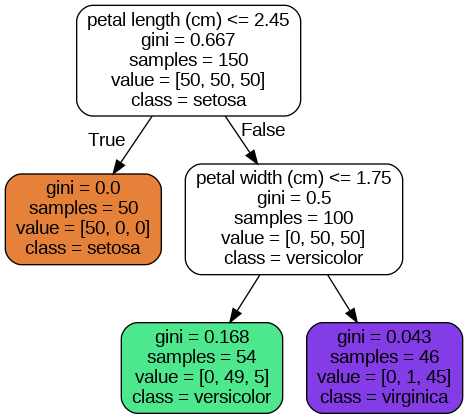


Decision Tree Setelah Modifikasi (menghapus outlier):


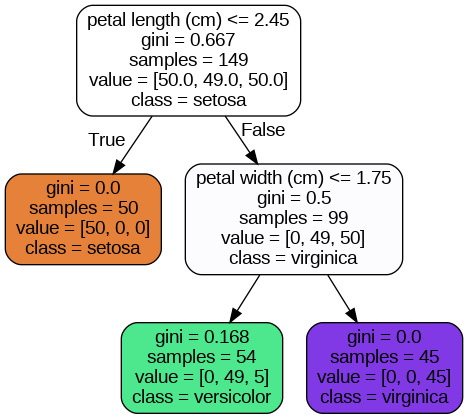

In [6]:
# Kode untuk menampilkan sensitivitas terhadap detail training set
# Import library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import os

# Memuat dataset Iris
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

# Menemukan indeks Iris versicolor terlebar (misalnya, kelopak 4.8cm panjang dan 1.8cm lebar)
# Ini adalah contoh instance yang bisa dihapus untuk menunjukkan ketidakstabilan
# Perlu diperhatikan bahwa Anda mungkin perlu menyesuaikan nilai atau mencari instance outlier lain
# tergantung pada dataset iris spesifik yang dimuat atau jika ada variasi data.
# Sebagai contoh, kita akan mencari instance yang dekat dengan batas Decision Tree.

# Misalnya, kita bisa menghapus satu instance Iris-Versicolor yang dekat dengan Iris-Virginica
# (petalnya panjang dan lebar)
# Cari instance Iris Versicolor (y=1)
iris_versicolor_indices = np.where(y == 1)[0]
# Pilih salah satu instance dari Iris-Versicolor yang memiliki panjang kelopak yang relatif besar
# dan lebar kelopak yang juga relatif besar, sehingga ia mendekati batas ke Iris-Virginica
# Misalnya, kita bisa menghapus instance dengan petal_length = 4.8 dan petal_width = 1.8
# Perlu diingat bahwa nilai ini mungkin tidak selalu ada persis, jadi ini adalah contoh konsep.
# Kita akan mencari instance yang memenuhi kriteria ini dalam data.
outlier_idx = None
for i in iris_versicolor_indices:
    if X[i, 0] == 4.8 and X[i, 1] == 1.8: # petal length 4.8, petal width 1.8
        outlier_idx = i
        break

# Jika outlier ditemukan, hapus dari data training
if outlier_idx is not None:
    X_modified = np.delete(X, outlier_idx, axis=0)
    y_modified = np.delete(y, outlier_idx, axis=0)
    print(f"Menghapus instance {outlier_idx} (Iris Versicolor: {X[outlier_idx]}) dari dataset.")
else:
    X_modified = X
    y_modified = y
    print("Outlier tidak ditemukan atau tidak dihapus. Menggunakan dataset asli.")

# Melatih Decision Tree pada dataset asli
tree_clf_original = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_original.fit(X, y)

# Melatih Decision Tree pada dataset yang dimodifikasi
tree_clf_modified = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_modified.fit(X_modified, y_modified)

# Fungsi untuk menyimpan gambar Decision Tree
def plot_decision_tree(tree_clf, filename, feature_names, class_names):
    export_graphviz(
        tree_clf,
        out_file=filename,
        feature_names=feature_names,
        class_names=class_names,
        rounded=True,
        filled=True
    )
    # Perintah untuk mengonversi .dot ke .png
    # Asumsi Graphviz sudah terinstal dan 'dot' ada di PATH
    os.system(f"dot -Tpng {filename} -o {filename.replace('.dot', '.png')}")

# Direktori untuk menyimpan gambar
IMAGES_PATH = "images/decision_trees_instability"
os.makedirs(IMAGES_PATH, exist_ok=True)

# Visualisasikan pohon asli
original_dot_path = os.path.join(IMAGES_PATH, "iris_tree_original.dot")
plot_decision_tree(tree_clf_original, original_dot_path, iris.feature_names[2:], iris.target_names)
print(f"Decision Tree asli disimpan di: {original_dot_path.replace('.dot', '.png')}")

# Visualisasikan pohon yang dimodifikasi
modified_dot_path = os.path.join(IMAGES_PATH, "iris_tree_modified.dot")
plot_decision_tree(tree_clf_modified, modified_dot_path, iris.feature_names[2:], iris.target_names)
print(f"Decision Tree yang dimodifikasi disimpan di: {modified_dot_path.replace('.dot', '.png')}")

# Untuk menampilkan gambar di Jupyter Notebook (memerlukan IPython.display.Image)
# Pastikan file PNG sudah tergenerate
try:
    print("\nDecision Tree Asli:")
    display(Image(filename=original_dot_path.replace('.dot', '.png')))
    print("\nDecision Tree Setelah Modifikasi (menghapus outlier):")
    display(Image(filename=modified_dot_path.replace('.dot', '.png')))
except FileNotFoundError:
    print("\nPastikan Graphviz sudah terinstal dan perintah 'dot' dapat diakses dari terminal Anda.")
    print("Jalankan: dot -Tpng [path_ke_file].dot -o [path_ke_file].png secara manual jika perlu.")

**Ketidakstabilan Decision Tree:**
Seperti yang Anda lihat dari visualisasi pohon Decision Tree di atas,
perubahan kecil pada data pelatihan (misalnya, menghapus satu instance outlier)
dapat menghasilkan perubahan yang signifikan pada struktur pohon.
Ini menunjukkan bahwa Decision Tree sangat sensitif terhadap variasi kecil dalam data pelatihan.
Ketidakstabilan ini dapat diatasi oleh Random Forests, yang akan kita bahas di bab berikutnya,
dengan merata-ratakan prediksi dari banyak pohon.

**Penjelasan Teori:** Ketidakstabilan ini dapat diatasi oleh Random Forests, yang akan kita bahas di bab berikutnya, dengan merata-ratakan prediksi dari banyak pohon.